### 2.2.1创建Tensor

In [2]:
import torch
# 创建一个5*3未初始化的Tensor
x = torch.empty(5, 3)
print(x)

tensor([[4.4721e+21, 1.6717e+19, 2.9843e-13],
        [5.1848e-43, 0.0000e+00, 0.0000e+00],
        [2.1019e-44, 0.0000e+00, 7.7140e+31],
        [2.8701e+32, 1.8524e+28, 1.6115e-43],
        [0.0000e+00, 0.0000e+00, 2.1019e-44]])


In [3]:
# 创建一个5*3随机初始化的tensor
x = torch.rand(5, 3)
print(x)

tensor([[0.5776, 0.7839, 0.8010],
        [0.3576, 0.9349, 0.8649],
        [0.3796, 0.8988, 0.4402],
        [0.8499, 0.7021, 0.8161],
        [0.4788, 0.8729, 0.7699]])


In [4]:
# 创建一个5*3的long型全0的tensor
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
# 直接根据数据创建tensor
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
# 通过现有tensor创建，此方法会默认重用输入tensor一些属性，如数据类型，除非自定义数据类型
x = x.new_ones(5, 3, dtype=torch.float64) # 返回的tensor默认具有相同的torch.dtype和torch.device
print(x)

x = torch.randn_like(x, dtype=torch.float) # 指定新的数据类型
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 2.2110, -0.5801, -1.4298],
        [ 0.5945,  1.5339, -1.3225],
        [-0.5460,  0.8128, -0.0110],
        [ 0.0689, -1.3708, -2.1429],
        [ 1.5929,  0.2732,  2.8972]])


In [7]:
# shape或size()来获取tensor的形状
print(x.size())
print(x.shape)

torch.Size([5, 3])
torch.Size([5, 3])


==返回的torch.Size其实就是一个tuple，支持所有tuple操作==

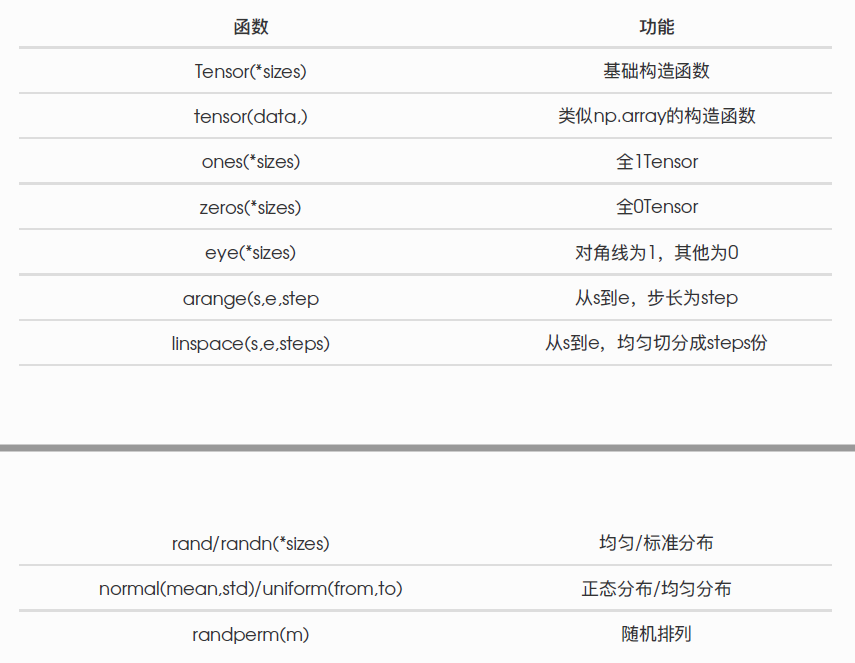
### 2.2.2 操作

In [8]:
# 加法
# 形式1
y = torch.rand(5, 3)
print(x + y)

# 形式2
print(torch.add(x, y))
# 指定输出
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

# 形式3 inplace
# adds x to y
y.add_(x)
print(y)

tensor([[ 3.0778,  0.2459, -0.8266],
        [ 1.5668,  2.4892, -0.4059],
        [-0.4204,  1.4549,  0.2849],
        [ 0.0722, -0.8951, -1.8348],
        [ 2.5431,  0.9035,  3.8729]])
tensor([[ 3.0778,  0.2459, -0.8266],
        [ 1.5668,  2.4892, -0.4059],
        [-0.4204,  1.4549,  0.2849],
        [ 0.0722, -0.8951, -1.8348],
        [ 2.5431,  0.9035,  3.8729]])
tensor([[ 3.0778,  0.2459, -0.8266],
        [ 1.5668,  2.4892, -0.4059],
        [-0.4204,  1.4549,  0.2849],
        [ 0.0722, -0.8951, -1.8348],
        [ 2.5431,  0.9035,  3.8729]])
tensor([[ 3.0778,  0.2459, -0.8266],
        [ 1.5668,  2.4892, -0.4059],
        [-0.4204,  1.4549,  0.2849],
        [ 0.0722, -0.8951, -1.8348],
        [ 2.5431,  0.9035,  3.8729]])


In [9]:
# 索引
## 索引结果与原数据共享内存，修改一个，另一个会跟着修改
y = x[0, :]
y += 1
print(y)
print(x[0, :]) # 源tensor也被改了

tensor([ 3.2110,  0.4199, -0.4298])
tensor([ 3.2110,  0.4199, -0.4298])


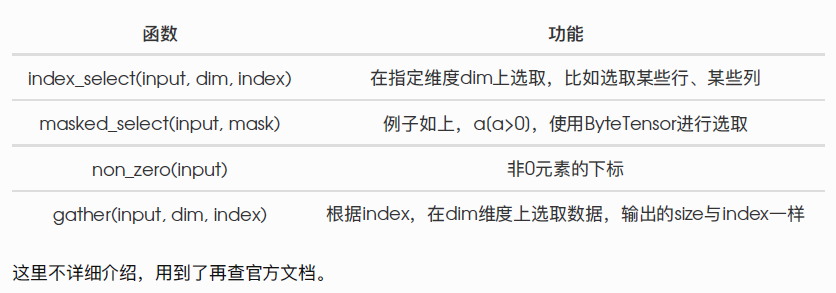

In [10]:
# 改变形状
## 用view()来改变tensor的形状
y = x.view(15)
z = x.view(-1, 5) # -1指的维度可用根据其他维度的值推出来
print(x.size(), y.size(), z.size())

torch.Size([5, 3]) torch.Size([15]) torch.Size([3, 5])


== view()返回的新tensor与源tensor共享内存，view仅仅改变了对这个张量的观察角度 ==

In [11]:
x += 1
print(x)
print(y) # 也加了1

tensor([[ 4.2110,  1.4199,  0.5702],
        [ 1.5945,  2.5339, -0.3225],
        [ 0.4540,  1.8128,  0.9890],
        [ 1.0689, -0.3708, -1.1429],
        [ 2.5929,  1.2732,  3.8972]])
tensor([ 4.2110,  1.4199,  0.5702,  1.5945,  2.5339, -0.3225,  0.4540,  1.8128,
         0.9890,  1.0689, -0.3708, -1.1429,  2.5929,  1.2732,  3.8972])


In [12]:
# 返回一个真正新的副本（不共享内存），reshape()可以改变形状，但并不能保证返回的是拷贝值
# 推荐优先用clone创造一个副本再用view

x_cp = x.clone().view(15)
x -= 1
print(x)
print(x_cp)
## 使用clone还有一个好处是会被记录在计算图中，即梯度会传回副本时也会传到tensor

tensor([[ 3.2110,  0.4199, -0.4298],
        [ 0.5945,  1.5339, -1.3225],
        [-0.5460,  0.8128, -0.0110],
        [ 0.0689, -1.3708, -2.1429],
        [ 1.5929,  0.2732,  2.8972]])
tensor([ 4.2110,  1.4199,  0.5702,  1.5945,  2.5339, -0.3225,  0.4540,  1.8128,
         0.9890,  1.0689, -0.3708, -1.1429,  2.5929,  1.2732,  3.8972])


In [13]:
# item()，将一个tensor转换成一个Python number
x = torch.randn(1)
print(x)
print(x.item())

tensor([1.4678])
1.4677667617797852


线性代数
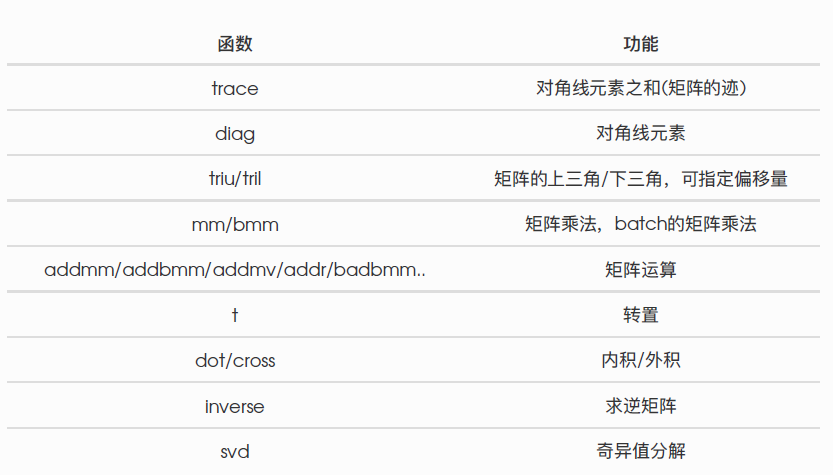
### 2.2.3 广播机制

In [14]:
# 两个形状不同的tensor按元素运算时，可能会触发广播（broadcasting）机制：先适当复制元素使tensor元素相同后再按元素运算
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

## x和y分别是1行2列和3行1列的矩阵，如果计算x+y，x第一行的2个元素被广播（复制）到了第二行和第三行，而y中第一列3个元素被广播（复制到了第二列。如此就可以对2个3行2列矩阵按元素相加

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


### 2.2.4运算的内存开销

In [15]:
# id函数：如果两个实例的ID一致，那么它们对应的内存地址相同
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y = y + x
print(id(y) == id_before) # False

False


In [16]:
# 指定结果到原来的y的内存，使用索引
# 把x+y结果通过[:]写进y对应的内存中
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
y[:] = y + x
print(id(y) == id_before) # True

True


In [17]:
# 使用运算符全名函数中的out参数或者自加运算符+=（也即add_()）达到上述效果
# 例如torch.add(x, y, out=y)和y += x(y.add_(x))
x = torch.tensor([1, 2])
y = torch.tensor([3, 4])
id_before = id(y)
torch.add(x, y, out=y) # y += x, y.add_(x)
print(id(y) == id_before) # True

True


### 2.2.5 tensor和Numpy相互转换
用numpy()和from_numpy()将tensor和NumPy数组相互转换
两个函数产生的tensor和NumPy中的数组共享相同的内存

torch.tensor()，将Numpy中的array转换成tensor，进行数据拷贝，返回的tensor与原来的数据不再共享

In [18]:
# Tensor转Numpy
# 使用numpy()将tensor转换成NumPy数组
a = torch.ones(5)
b = a.numpy()
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

tensor([1., 1., 1., 1., 1.]) [1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.]) [2. 2. 2. 2. 2.]
tensor([3., 3., 3., 3., 3.]) [3. 3. 3. 3. 3.]


In [19]:
# Numpy数组转tensor
# 使用from_numpy()将Numpy数组转换成tensor
import numpy as np 
a = np.ones(5)
b = torch.from_numpy(a)
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)
# 所有CPU上的tensor（除CharTensor）都支持与Numpy数组相互转换
# 直接用torch.tensor()将Numpy数组转换为Tensor，进行数据拷贝，返回的tensor和原来的数据不再共享
c = torch.tensor(a)
a += 1
print(a, c)

[1. 1. 1. 1. 1.] tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.] tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)
[4. 4. 4. 4. 4.] tensor([3., 3., 3., 3., 3.], dtype=torch.float64)


## 2.3 自动求梯度
autograd根据输入和前向传播过程自动构建计算图，并执行反向传播
### 2.3.1 概念
Tensor是这个包的核心类，如果将其属性.requires_grad设置为True，将开始追踪（track）在其上的所有操作（这样就可以利用链式法则进行梯度传播）。
完成计算后，调用.backward()来完成所有梯度计算。此tensor的梯度将累积到.grad属性中



如果不想继续追踪，调用.detach()将其从追踪记录中分离出来，可以防止将来的计算被追踪，这样梯度就传不过去了。
还可以用with torch.no_grad()将不想被追踪的操作代码包裹起来，在评估模型的时候很常用，因为在评估模型时，并不需要计算可训练参数（requies_grad=True）的梯度


Function是另一个很重要的类。tensor和Function互相结合就可以构建一个记录有整个计算过程的有向无环图（DAG）
每个tenosr都有一个.grad_fn属性，该属性即创建该tensor的Function，就是说该tensor是不是通过某些运算得到的，若是，则grad_fn返回一个与这些运算相关的对象，否则是None

### 2.3.2 Tensor

In [21]:
# 创建一个tensor并设置requires_grad=True
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
None


In [22]:
y = x + 2
print(y)
print(y.grad_fn)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


== x是直接创建的，所以没有grad_fn，而y是通过一个加法创建的，有一个为“AddBackward”的grad_fn ==
像x这种直接创建的成为叶子节点，叶子节点对应的grad_fnwe

In [23]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [24]:
# 通过.requires_grad_()来用in-place的方式改变requires_grad属性
a = torch.randn(2, 2) # 缺失情况下默认 requires_grad = False
a = ((a * 3) / (a - 1))
print(a.requires_grad) # False
a.requires_grad_(True)
print(a.requires_grad) # True
b = (a * a).sum()
print(b.grad_fn)

False
True


### 2.3.2 梯度

In [25]:
## 因为out是一个标量，所以调用backward()时不需要指定求导变量
out.backward() # 等价于out.backward(torch.tensor(1.))

# out关于x的梯度
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


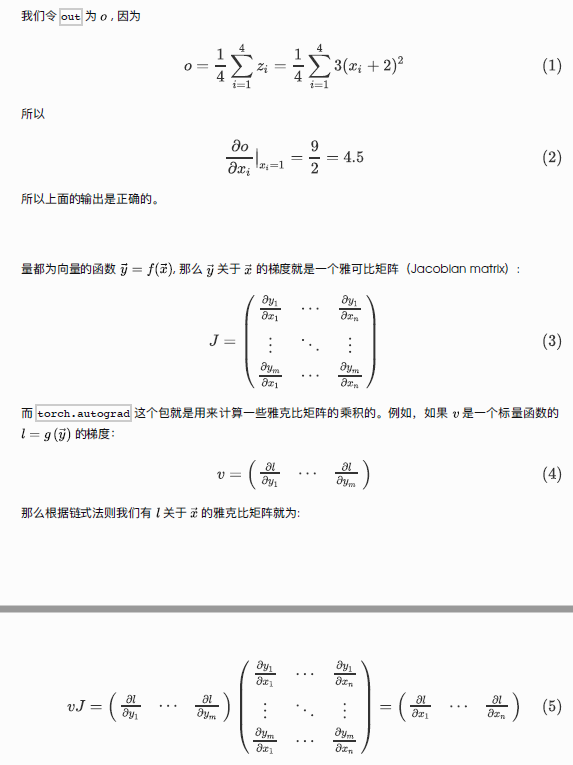
== grad在反向传播过程中是累加的（accumulated），意味着每一次运行反向传播，梯度都会累加之前的梯度，所以一般在反向传播之前需要把梯度清零==

In [26]:
# 再来反向传播一次，注意grad是累加的
out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])
tensor([[1., 1.],
        [1., 1.]])


== y.backward()，如果y是标量，则不需要为backward()传入任何参数；否则需要传入一个与y同形的tensor。避免向量（甚至更高维张量）对张量求导，而转换为标量对张量求导，求导结果和自变量同行的张量。==


==假设y由自变量x计算而来，w和y同行张量，则y.backward(w)的含义是：先计算 l=torch.sum(y*w)，则l是个标量，然后求l对自变量x的导数。==

In [27]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
print(z)

tensor([[2., 4.],
        [6., 8.]], grad_fn=<ViewBackward>)


In [28]:
# y不是一个标量，所以在调用backward时需要传入一个和y同形权重向量进行加权求和得到一个标量
v = torch.tensor([[1.0, 0.1], [0.01, 0.01]], dtype=torch.float)
z.backward(v)
print(x.grad)

tensor([2.0000, 0.2000, 0.0200, 0.0200])


== x.grad是和x同形的张量 ==

In [30]:
# 中断梯度追踪
x = torch.tensor(1.0, requires_grad=True)
y1 = x ** 2
with torch.no_grad():
    y2 = x ** 3
y3 = y1 + y2

print(x.requires_grad)
print(y1, y1.requires_grad) # True
print(y2, y2.requires_grad) # False
print(y3, y3.requires_grad) # True

True
tensor(1., grad_fn=<PowBackward0>) True
tensor(1.) False
tensor(2., grad_fn=<AddBackward0>) True


y2是没有grad_fn而且ye.requires_grad=False的，而y3是有grad_fn的

In [31]:
# 将y3对x求梯度
y3.backward()
print(x.grad)

tensor(2.)


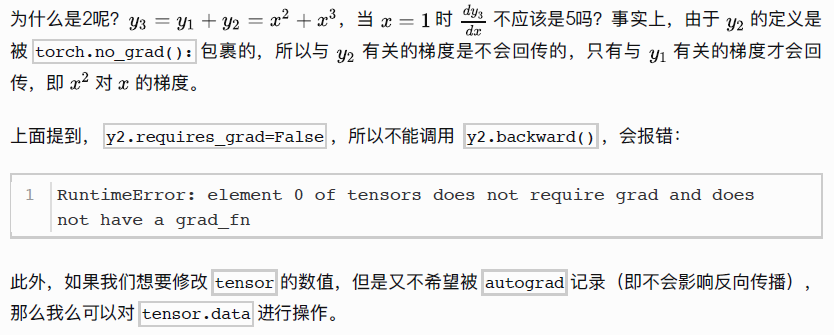

In [33]:
# 修改tensor数值，不被autograd记录（不影响反向传播），对tensor.data进行操作
x = torch.ones(1, requires_grad=True)

print(x.data) # 还是一个tensor
print(x.data.requires_grad) # 但是已经是独立于计算图之外

y = 2 * x 
x.data *= 100 # 只改变了值，不会记录在计算图，所以不会影响梯度传播

y.backward()
print(x) # 更改data的值也会影响tensor的值
print(x.grad)

tensor([1.])
False
tensor([100.], requires_grad=True)
tensor([2.])


## 3.1 线性回归
线性回归输出是一个连续值，因此适用于回归问题。回归问题如预测房屋价格、气温、销售额等连续值问题。



与回归问题不同，分类问题中模型的最终输出是一个离散值。图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题范畴。softmax回归则适用于分类问题


由于线性回归和softmax回归都是单层神经网络，涉及的概念和技术同样适用于大多数的深度学习模型


### 3.1.1 线性回归的要素

以一个简单的房屋预测作为例子解释线性回归的基本要素，应用的目标是预测一栋房子的售出价格，价格取决于很多因素如房屋状况、地段、市场行情等。简单起见，假设价格只取决于房屋状况的两个因素：面积（平方米）和房龄（年），探索价格与这两个因素的具体关系

### 3.1.1.1 模型定义
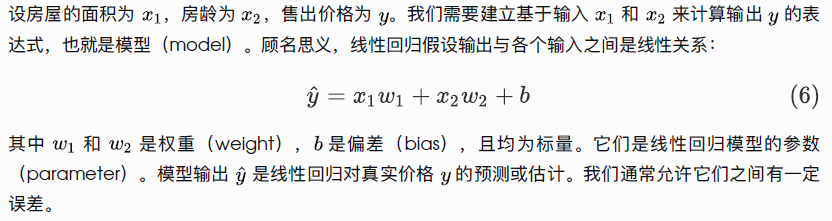

#### 3.1.1.2 模型训练
通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小，这个过程叫做模型训练（medel training）。模型训练所设计的3个要素：
* （1）训练数据
    
    
    收集一系列的真实数据，如多栋房屋的真实售出价格和它们对应的面积和房龄，希望在这个数据上寻找模型参数来使模型的预测价格与真实价格的误差最小。该数据集称为训练数据集（training dataset）或训练集 （training set），一栋房屋称为一个样本（simple），其真实售出价格叫做标签（lable），用来预测标签的两个因素叫做特征（feature），特征用来表征样本的特点。
   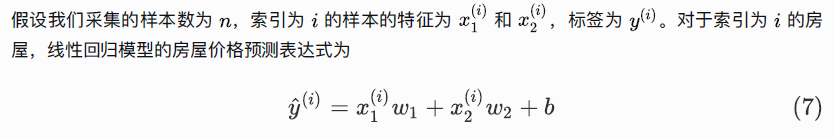 

* （2） 损失函数
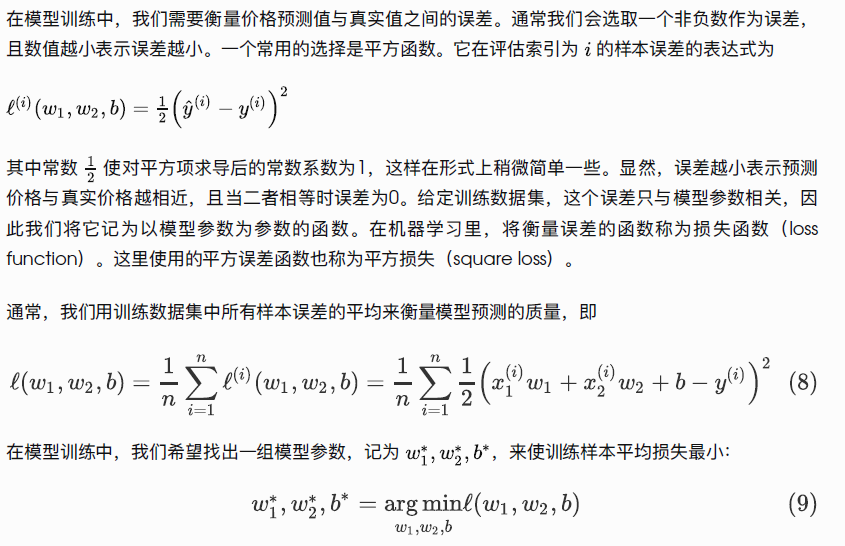

* （3）优化算法
    
    
    当模型和损失函数形式较为简单时，误差最小化问题的解可以直接用公式表达出来。这类解叫做解析解（analytical solution）。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫做数值解（numerical solution）
    
    
    在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机取样；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch），然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。
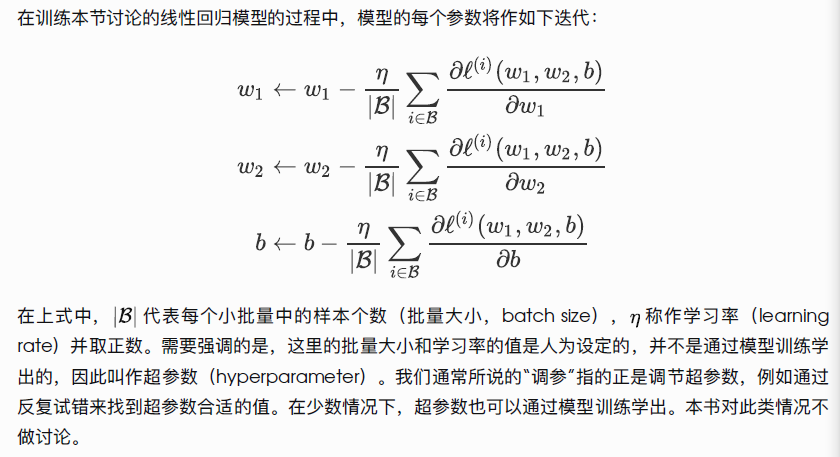

#### 3.1.1.3 模型预测
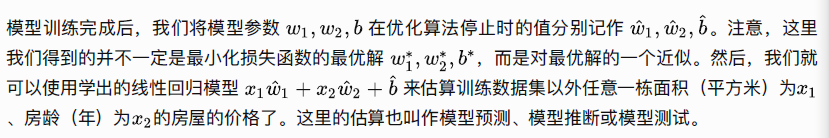

### 3.1.2 线性回归的表达方法

#### 3.1.2.1 神经网络图
图3.1使用神经网络图表示本节中介绍的线性回归模型，神经网络图隐去了模型参数权重和偏差
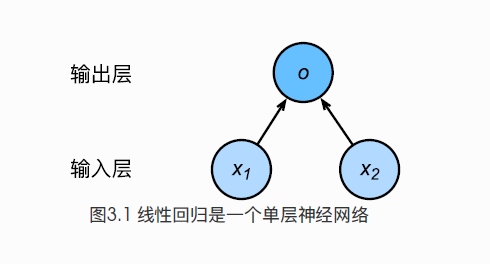
输入分别为x1和x2，输入层的输入个数为2.输入个数也叫特征数或特征向量维度。输出为o，输出层的输出个数为1。直接将输出o作为线性回归的输出，即y_hat=o。由于输入层不涉及计算，按惯例，神经网络的层数为1。所以线性回归是一个单层神经网络。输出层中复制计算o的单元又叫神经元。在线性回归中，o的计算依赖于x1和x2，输出层中的神经元和输入层中各个输入完全连接，因此。这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）
#### 3.1.2.2 矢量计算表达式

In [1]:
# 定义两个1000维的向量
import torch
from time import time

a = torch.ones(1000)
b = torch.ones(1000)

# 向量相加，将两个向量按元素逐一做标量加法
start = time()
c = torch.zeros(1000)
for i in range(1000):
    c[i] = a[i] + b[i]
print(time() - start)

0.011884689331054688


In [2]:
# 向量相加，将两个向量直接做矢量加法
start = time()
d = a + b
print(time()- start)

## 后者比前者更省时，应尽可能采用矢量计算，提高计算效率

0.0


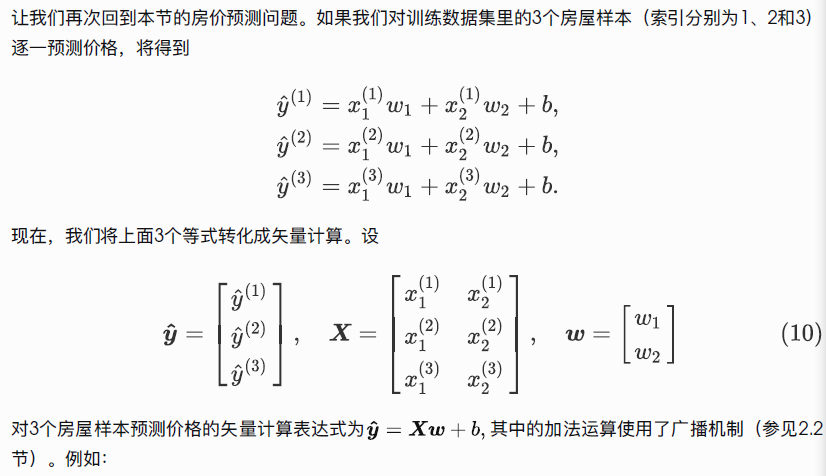

In [3]:
a = torch.ones(3)
b = 10
print(a + b)

tensor([11., 11., 11.])


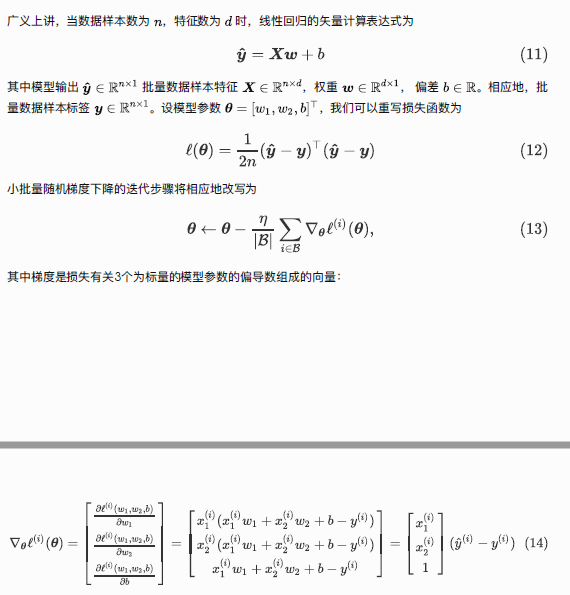


小结
* 和大多深度学习模型一样，对于线性回归这样一种氮吹神经网络，基本要素包括模型、训练数据、损失函数和优化算法
* 既可以用神经网络图表示线性回归，又可以用矢量计算表达该模型
* 应可能采用矢量计算，提高计算效率

## 3.2 线性回归的从零开始实现

In [41]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt 
import numpy as np
import random

### 3.2.1 生成数据集
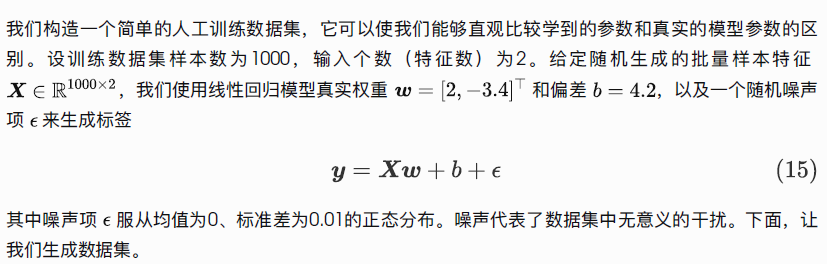

In [15]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0, 1, (num_examples, num_inputs)))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.from_numpy(np.random.normal(0, 0.01, size=labels.size()))

# features[0]的每一行是一个长度为2的向量，而labels的每一行是一个长度为1的向量（标量）
print(features[0], labels[0])

tensor([-0.7558,  0.4204], dtype=torch.float64) tensor(1.2634, dtype=torch.float64)


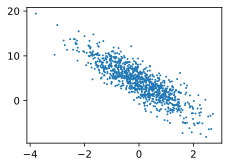

In [16]:
# 通过生成第二个特征features[:, 1]和标签labels的散点图，更直接观察两者间的线性关系
def use_svg_dispaly():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_dispaly()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

# # 在../d2lzh_pytorch里面添加上上面两个函数后就可以这样导入
# import sys
# sys.path.appand("..")
# from d2lzh_pytorch import *

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

将上面的plt作图以及use_svg_display函数和set_figsize函数定义在d2lzh_pytorch包里。以后在作图时，直接调用d2lzh_pytorch.plt。由于plt在d2lzh_pytorch包中是一个全局变量，在作图前只需要调用d2lzh_pytorch.set_figsize()即可打印矢量图并设置图的尺寸

### 3.2.2 读取数据

In [17]:
# 训练模型时，需遍历数据集并不断读取小批量数据样本。
# 定义一个函数：每次返回batch_size(批量大小)个随机样本的特征和标签

# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices) # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield features.index_select(0, j), labels.index_select(0, j)

# 读取第一个小批量数据样本并打印
# 每个批量的特征形状为(10, 2)，分别对应批量大小和输入个数；标签形式为批量大小
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.9884, -1.5265],
        [ 0.5183,  1.4714],
        [ 1.0372,  1.1356],
        [-0.6950,  1.4263],
        [ 0.5910,  0.1185],
        [ 1.0263,  0.2489],
        [-0.2440,  0.7935],
        [ 0.3382, -1.7151],
        [-1.7896,  0.5388],
        [-0.5876, -1.1915]], dtype=torch.float64) tensor([ 7.4081,  0.2320,  2.4091, -2.0416,  4.9656,  5.4112,  1.0196, 10.7108,
        -1.2067,  7.0755], dtype=torch.float64)


### 3.2.3 初始化模型参数

In [18]:
# 权重初始化成均值为0、标准差为0.01的正太随机数，偏差则初始化成0
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

# 之后的模型训练中，需要对这些参数求梯度来迭代参数的值，因此requires_grad=True

w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

### 3.2.4 定义模型

In [19]:
# 线性回归的矢量计算表达式的实现，使用mm函数做矩阵乘法
def linreg(X, w, b): # 本函数已保存在d2lzh_pytorch包中方便以后使用
    return torch.mm(X, w) + b

### 3.2.5 定义损失函数

In [20]:
# 平均损失来定义线性回归的损失函数。
# 把真实值y变形成预测值y_hat的形状，以下函数返回的结果也将和y_hat的形状相同

def squared_loss(y_hat, y):
    # 返回的是向量，pytorch中的MSELoss没有除以2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

### 3.2.6 定义优化算法

In [21]:
# SGD函数实现小批量随机梯度下降算法。通过不断迭代模型参数来优化损失函数
# 自动求梯度模块计算得来的梯度是一个批量样本的梯度和，将它除以批量大小得到平均值

def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param使用的param.data

### 3.2.7 训练模型

在训练中，多次迭代模型参数。在每次迭代中，根据当前读取的小批量数据样本（特征x和标签y），通过调用反向函数backward计算小批量随机梯度，并调用优化算法SGD迭代模型参数。


由于之前设置批量大小batch_size为10，每个小批量的损失l的形状为(10, 1).由于变量l 不是一个标量，调用.sum()将其求和得到一个标量，再运行l.backward()得到该变量有关模型参数的梯度。每次更新完参数后不要忘了将参数的梯度清零



在一个迭代周期（epoch）中，完整遍历data_iter函数，对训练集所有样本都是用一次（假设样本数能被批量大小整除）。这里的迭代周期个数num_epochs和学习率lr都是超函数，分别设3和0.03。实践中，大多超参数都需要通过反复试错来调节。虽然迭代周期数设置越大可能越有效，但训练时间可能过长

In [22]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。
    # X和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
        
        # 不要忘了梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #3 'mat2' in call to _th_addmm_out

In [23]:
# 失败

# 比较学到的参数和用来生成训练集的真实参数，应该很接近
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[0.0055],
        [0.0010]], requires_grad=True)
4.2 
 tensor([0.], requires_grad=True)


小结
* 仅使用Tensor和autograd模块就可以很容易地实现一个模型
## 3.3 线性回归地简洁实现
### 3.3.1 生成数据集

In [42]:
import torch
from torch import nn
import numpy as np
torch.manual_seed(1)

print(torch.__version__)
torch.set_default_tensor_type('torch.FloatTensor')

1.5.0+cpu


In [43]:
# features是训练数据特征，labels是标签
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

### 3.3.2 读取数据

In [44]:
# Pytorch提供data包来读取数据。由于data常用作变量名，将导入的data模块用Data代替
# 每次迭代中，随机读取10个数据样本的小批量
import torch.utils.data as Data 

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

# data_iter的使用和上一节一样，读取并打印第一个小批量数据样本
for X, y in data_iter:
    print(X, y)
    break

tensor([[-0.6021, -0.0581],
        [ 2.3266, -1.1068],
        [ 0.1131,  0.4894],
        [ 2.1464, -0.3043],
        [ 0.2064, -0.4235],
        [ 1.1382,  0.4831],
        [-0.1323,  0.0997],
        [-0.1409,  0.8464],
        [-0.6377,  0.0626],
        [ 2.3184, -1.7252]]) tensor([ 3.1810, 12.6232,  2.7595,  9.5112,  6.0310,  4.8364,  3.5992,  1.0364,
         2.7047, 14.6989])


### 3.3.3 定义模型
导入torch.nn模型，nn是neural networks（神经网络）的缩写，定义了大量神经网络的层。


之前使用了autograd,而nn就是利用autograd来定义模型。nn的核心数据结构是Module，既可以表示神经网络某个层（layer），也可以表示一个包含很多层的神经网络。实际中，最常用的做法是继承nn.Module，撰写自己的网络。


一个nn.Module实例应该包含一个层以及返回输出的向前传播（forward）方法

In [45]:
# 用nn.Module实现一个线性回归模型
import torch.nn
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
        # forward定义向前传播
        def forward(self, x):
            y = self.linear = nn.Linear(x)
            return y

net = LinearNet(num_inputs)
print(net) # 使用print打印网络结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


用nn.Sequential来方便地搭建网络，Sequential是一个有序地容器，网络层将按照再传入Sequential的顺序依次添加到计算图中

In [46]:
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


In [34]:
# 通过net.parameters()来查看模型所有的可学习参数，此函数返回一个生成器
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[0.5347, 0.7057]], requires_grad=True)
Parameter containing:
tensor([0.6873], requires_grad=True)


== torch.nn仅支持输入一个batch样本不支持单个样本输入，如果只有单个样本，可使用input.undqueeze(0)来添加一维
### 3.3.4 初始化模型参数
通过init.normal_将权重参数每个元素初始化为随机采样于均值为0、标准差为0.01的正太分布。偏差会初始化为0

In [47]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(net[0].bias, val=0) # 也可以直接修改bias的data：net[0].bias.data.fill_(0)

Parameter containing:
tensor([0.], requires_grad=True)

In [48]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.0142, -0.0161]], requires_grad=True)
Parameter containing:
tensor([0.], requires_grad=True)


### 3.3.5 定义损失函数
损失函数可看作一种特殊的层，pytorch将其实现为nn.Module的子类，使用提供的均方误差损失作为模型的损失函数

In [49]:
loss = nn.MSELoss ()

### 3.3.6 定义优化算法
torch.optim模块提供很多常用的优化算法如SGD、Adam和RMSProp等。


创建一个优化net所有参火速的优化器实例，指定学习率为0.03的小批量随机梯度下降（SGD）为优化算法

In [50]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [51]:
# 为不同子网络设置不同的学习率，这在flnetune时经常用到
optimizer = optim.SGD([
    # 如果对某个参数不指定学习率，就是用最外层的默认学习率
    {'params':net.subnet1.parameters()}, # lr = 0.03
    {'params':net.subnet2.parameters(), 'lr':0.01}
], lr=0.03)


AttributeError: 'Sequential' object has no attribute 'subnet1'

In [52]:
# 调整学习率
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.01 # 学习率为之前的0.1倍

### 3.3.7 训练模型
调用optim实例中step函数来迭代模型参数

In [54]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 16.719294
epoch 2, loss: 15.569821
epoch 3, loss: 16.382263


In [55]:
# 比较学习的模型参数和真实的模型参数。从net获得需要的层，并访问权重和偏差
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)


[2, -3.4] Parameter containing:
tensor([[ 0.4113, -0.7123]], requires_grad=True)
4.2 Parameter containing:
tensor([0.8827], requires_grad=True)


小结
* 使用Pytorch更简洁地实现模型
* torch.utils.data模块提供了有关数据处理的工具，torch.nn模块定义了大量神经网络的层，torch.nn.init模块定义了各种初始化方法，torch.optim模块提供模型参数优化方法
## 3.4 Softmax回归
线性回归模型适用于输出为连续值的情景。对于离散值预测问题，使用诸如softmax回归在内的分类模型。
### 3.4.1 分类问题
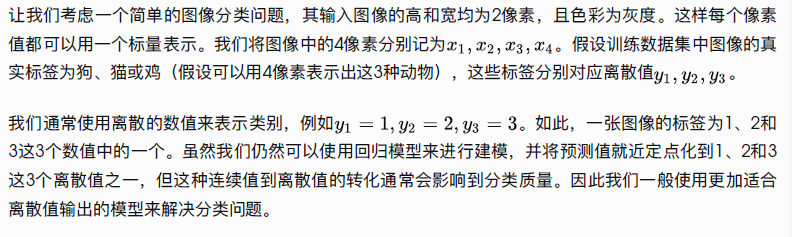

### 3.4.2 Softmax回归模型
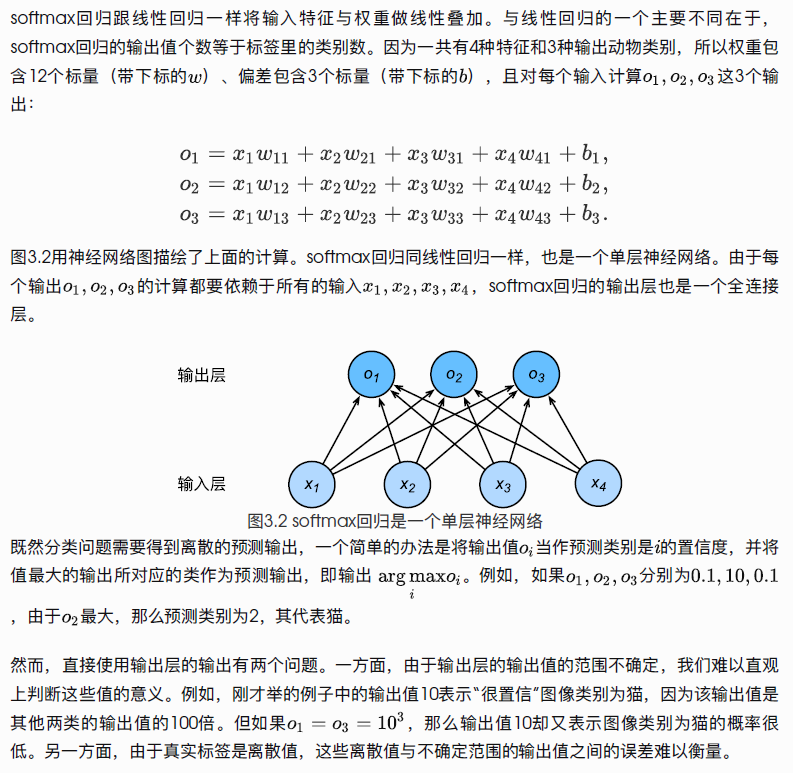

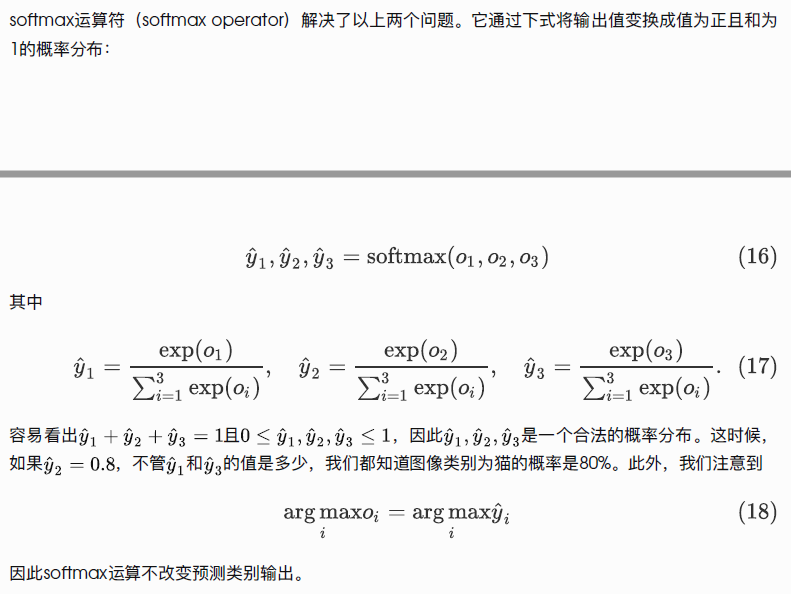

### 3.4.3 单样本分类的矢量计算表达式
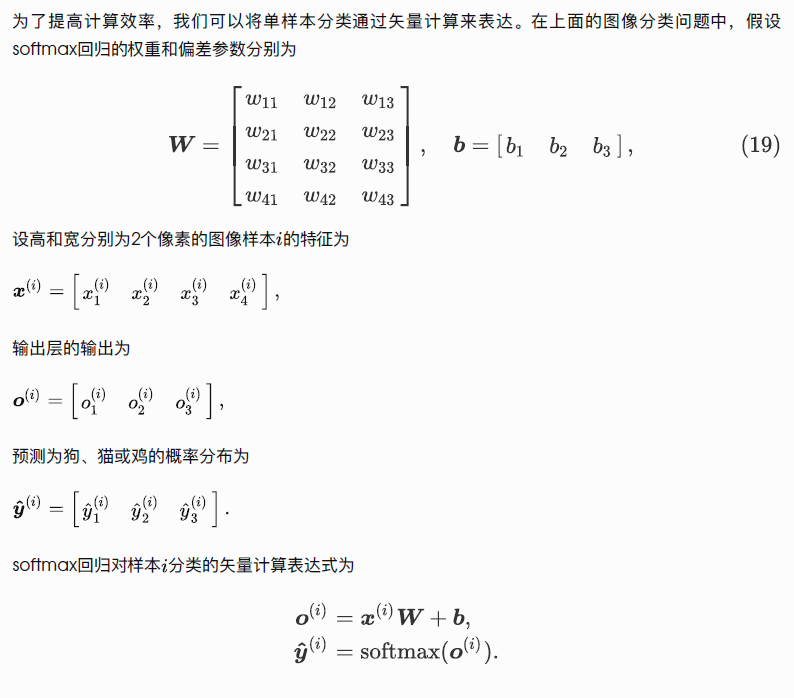

### 3.4.4 小批量样本分类的矢量计算表达式
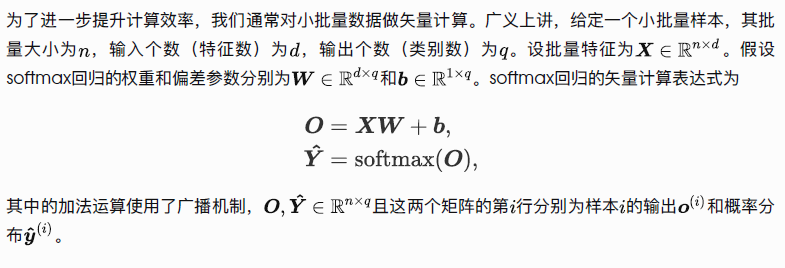

### 3.4.5 交叉熵损失函数
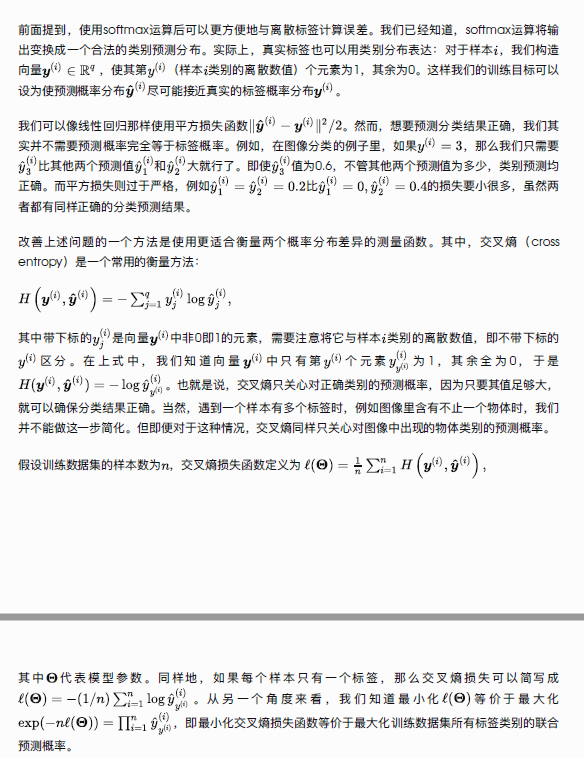

### 3.4.6 模型预测及评价
训练好softmax回归模型后，给定任一样本特征，就可以预测每个输出类别的概率。将预测概率最大的类别作为输出类别，如果与真实类别（标签）一致，说明预测正确。



小结
* softmax回归适用于分类问题。使用softmax运算输出类别的概率
* softmax回归是一个单层神经网络，输出个数等于分类问题中的类别个数
* 交叉熵适合衡量两个概率分布的差异

## 3.5 图像分类数据集（Fshion-Mnist）
torchbision主要由以下部分构成：
* torchvision.datasets：加载数据的函数及常用的数据集接口
* torchvision.models:包含常用的模型结构（含预训练模型），如AlexNet、VGG、ResNet等
* torchvision.transforms:常用的图片变换。例如裁剪、旋转等
* torchvision.utilis：其他一些有用的方法

### 3.5.1 获取数据集

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import sys
import d2lzh_pytorch as d2l

ModuleNotFoundError: No module named 'torchvision'